Max Height Drag: 25.9172619093
Max Height No Drag: 41.9629699825
Max Range Drag: 135.507455921
Max Range No Drag: 286.703215501


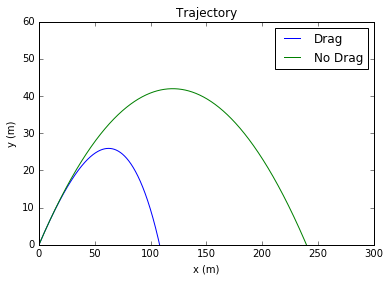

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

C_d = 0.5
rho = 1.16
m = 0.145
r = 0.0366
g = 9.8
A = np.pi*0.0366**2

b= 1/(2*m) * rho * A * C_d

def y_acceleration(v_x, v_y, **kwargs):
    return -g - b * np.sqrt(v_x**2 + v_y**2) * v_y

def x_acceleration(v_x, v_y):
    return -b * np.sqrt(v_x**2 + v_y**2) * v_x

def F(r, t):
    v_x, v_y = r[2], r[3]
    a_x, a_y = x_acceleration(v_x, v_y), y_acceleration(v_x, v_y)
    return np.array([v_x, v_y, a_x, a_y])


T = np.linspace(0,7, 1000)
r = np.array([0, 0, 50*np.cos(35*np.pi/180), 50*np.sin(35*np.pi/180)])

data = odeint(F, r, T)
X1, Y1, VX1, VY1 = data[:,0], data[:, 1], data[:,2], data[:,3]

plt.plot(X1, Y1, label='Drag')
plt.title('Trajectory')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

b = 0

data = odeint(F, r, T)
X2, Y2, VX2, VY2 = data[:,0], data[:, 1], data[:,2], data[:,3]

plt.plot(X2, Y2, label='No Drag')
plt.legend(loc='best')
plt.ylim(0,60)

print('Max Height Drag:', max(Y1))
print('Max Height No Drag:', max(Y2))
print('Max Range Drag:', max(X1))
print('Max Range No Drag:', max(X2))

In [53]:
def g_acceleration(r):
    '''Return the acceleration due to gravity at a distance r from earth.
    
    Parameters:
    
    r : radius (height) [m]
    
    Returns:
    
    g : acceleration due to gravity [m/s^2]'''
    
    G = 6.6742*10**-11 # gravitational constant, Nm^2/kg^2
    M = 5.9722*10**24 # mass of earth, kg
    R = 6371*10**3 # radius of earth, m
    
    g = G*M/(r + R)**2
    return g

def force_gravity(m, y):
    '''Calculate the force of gravity on an object.
    
    Parameters:
    
    m : mass of object [kg]
    h : height [m]
    
    returns:
    
    F_g : force due to gravity [N]'''
    
    F_g = m*g_acceleration(y)
    return F_g

def air_density(y):
    '''Calculate (a close approximation of) the air density at a given 
    height.
    
    Parameters:
    
    y : height above sea level [m]
    
    Returns:
    
    rho : density at height h [kg/m^3]'''
    
    
    rho_0 = 1.225 # sea level density, kg/m^3
    L = 0.0065 # temperature lapse rate, K/m
    # Temperature is obviously NOT constant and this is a simplification
    T = 288.15 # temperature, K
    M = 0.0289644 # molar mass of dry air, kg/mol
    R = 8.31447 # ideal gas constant, J/(mol K)
    g = g_acceleration(y) # acceleration due to gravity at height h [m/s^2]
    
    rho = rho_0 * np.exp(-g*M*y/(R*T))
    return rho
    
    

def force_drag(vx, vy, y, **kwargs):
    '''Return the drag force the rocket experiences during flight.
    
    Parameters:
    
    vx : x velocity [m/s]
    vy : y velocity [m/s]
    h : height [m]
    **kwargs : keyword arguments for cross-sectional area and drag coefficeint
    
    Returns:
    
    F_drag: force due to drag [N]'''
    
    rho = air_density(y)
    b = 1/(2*m) * rho * A * C_d
    
    F_drag = b*(vx**2 + vy**2)
    return F_drag
    


def test_drag_constant():
    '''Return the drag force the rocket experiences during flight with constant air density.'''
    pass
    
def test_drag_variable():
    '''Return the drag force the rocket experiences during flight with changing air density'''
    pass

# TESTING!!!!!!!

0.2195858222883362

what is life